# Vehicle Sales Analysis CMSC320
Checkpoint 2 - Data Exploration\
By Aditya Eswaran & Nathan Dung

## Data Preprocessing
Using the DVM-CAR dataset provided by Jingming Huang, et. al., we will explore car sales data over the years.

**Purpose**\
Our aim is to understand how different cars, brands, engine types, or other factors impact the rate of depreciation in the automotive industry.

---

**Importing neccessary modules**

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

**Data Tables**
- *Price Table*: Original price of entry-level trims of new cars.
- *Ad Table*: Used car listings with price, age, and mileage.
- *Trim Table*: A more detailed view of the vehicle on selling price, fuel type, engine size, and more.
- *Sales Table*: Contains over 20 years of sales data in the UK car market from 2001 to 2020.

**Auxillary Tables**
- *Basic Table*: Used for indexing other tables, containing names of the brands and models

**Price Table**\
There is no need to clean this data, since all rows have valid values for year and price.

In [347]:
prices = pd.read_csv('Price_table.csv')
display(prices)

,Maker,Genmodel,Genmodel_ID,Year,Entry_price
0,Abarth,124 Spider,2_1,2016,29365
1,Abarth,124 Spider,2_1,2017,26665
2,Abarth,124 Spider,2_1,2018,26665
3,Abarth,124 Spider,2_1,2019,29515
4,Abarth,500,2_2,2009,13400
...,...,...,...,...,...
6328,Volvo,V50,96_9,2008,15780
6329,Volvo,V50,96_9,2009,15770
6330,Volvo,V50,96_9,2010,17465
6331,Volvo,V50,96_9,2011,17615


**Ad Table**\
This data will be cleaned at a later section (See: Cleaning the Data)

In [348]:
ads = pd.read_csv('Ad_table.csv')
display(ads)

C:\Users\quann\AppData\Local\Temp\ipykernel_7632\1025285888.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ads = pd.read_csv('Ad_table.csv')


,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268250,Westfield,Sport,97_1,97_1$$1,2018,5,Yellow,2006.0,Convertible,1800,2.2L,Manual,Petrol,8750,2.0,NaN
268251,Westfield,Sport,97_1,97_1$$2,2018,5,Yellow,2006.0,Convertible,2009,NaN,Manual,NaN,7995,NaN,NaN
268252,Zenos,E10,99_1,99_1$$1,2018,3,Red,2016.0,Convertible,6,2.0L,Manual,Petrol,27950,2.0,NaN
268253,Zenos,E10,99_1,99_1$$2,2018,3,Green,2016.0,Convertible,1538,2.0L,Manual,Petrol,34950,2.0,NaN


**Trim Table**\
There is no need to clean this data, since all rows have valid values for year price, and fuel type.

In [349]:
trims = pd.read_csv('Trim_table.csv')
display(trims)

,Genmodel_ID,Maker,Genmodel,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2016,29365,148,Petrol,1368
1,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2016,31365,153,Petrol,1368
2,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp 2d,2017,29365,148,Petrol,1368
3,2_1,Abarth,124 spider,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2017,31365,153,Petrol,1368
4,2_1,Abarth,124 spider,124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d,2017,26665,148,Petrol,1368
...,...,...,...,...,...,...,...,...,...
335557,96_20,Volvo,Xc40,XC40 SUVR-Design Pro T4 AWD auto 5d,2018,35250,163,Petrol,1969
335558,96_20,Volvo,Xc40,XC40 SUVR-Design Pro T5 AWD auto 5d,2018,36750,166,Petrol,1969
335559,96_20,Volvo,Xc40,XC40 SUVR-Design T3 FWD 5d,2018,29200,144,Petrol,1477
335560,96_20,Volvo,Xc40,XC40 SUVR-Design T4 AWD auto 5d,2018,33350,161,Petrol,1969


**Sales Table**\
There is no need to clean this data, since missing data is intentional.

In [350]:
sales = pd.read_csv('Sales_table.csv')
display(sales)

,Maker,Genmodel,Genmodel_ID,2020,2019,2018,2017,2016,2015,2014,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,ABARTH,ABARTH 124,2_1,0,19,27,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABARTH,ABARTH 500,2_2,0,0,1,2,66,717,762,...,915,766,0,0,0,0,0,0,0,0
2,ABARTH,ABARTH 595,2_4,2144,2866,3907,3295,3132,1612,516,...,0,0,0,0,0,0,0,0,0,0
3,ABARTH,ABARTH 695,2_6,45,65,270,114,29,10,14,...,0,0,0,0,0,0,0,0,0,0
4,ABARTH,ABARTH PUNTO,2_9,0,0,0,0,0,0,56,...,97,172,74,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,VOLVO,VOLVO XC40,96_20,24281,14894,6616,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,VOLVO,VOLVO XC60,96_16,7694,11182,10840,14994,14808,12830,9102,...,4548,3373,308,0,0,0,0,0,0,0
770,VOLVO,VOLVO XC70,96_17,0,0,0,17,1006,1586,1710,...,1447,1067,1059,1423,1347,1524,963,626,119,0
771,VOLVO,VOLVO XC90,96_18,4969,7495,6475,5564,5254,2756,2319,...,6392,3633,1879,3232,3547,4614,3901,1507,0,0


**Basic Table**\
Since this table is only used for model and brand name, otuput has been suppressed.

In [351]:
basics = pd.read_csv('Basic_table.csv')

---

## Cleaning the data

**Filtering out invalid entries**\
Since there are some rows without entries for price, mileage, or reg_year, we will remove these as they are not useful for our observations. Additionally, we will remove rows that lack engine size, gearbox, and fuel type.

In [352]:
# Initial filtering (price, year, mileage)
ads = ads.dropna(subset=['Price', 'Reg_year', 'Runned_Miles'])

# More filtering (engine size, gearbox, fuel type)
ads = ads.dropna(subset=['Engin_size', 'Gearbox', 'Fuel_type'])

# Format the registration year as an integer, not decimal
ads['Reg_year'] = ads['Reg_year'].astype(int)

display(ads['Bodytype'].unique())

array(['Saloon', 'Convertible', 'SUV', 'Estate', 'Coupe', nan,
       'Hatchback', 'MPV', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Pickup', 'Car Derived Van', 'Tipper', 'Camper',
       'Chassis Cab', 'Limousine'], dtype=object)

**The following data is now cleaned and ready to explore!**
- *Price Table*: Original price of entry-level trims of new cars.
- *Ad Table*: Used car listings with price, age, and mileage.
- *Trim Table*: A more detailed view of the vehicle on selling price, fuel type, engine size, and more.
- *Sales Table*: Contains over 20 years of sales data in the UK car market from 2001 to 2020.

**Auxillary Tables**
- *Basic Table*: Used for indexing other tables, containing names of the brands and models

---

## Distribution of Depreciation

**Calculating the depreciation**\
To do this, we merge table data from the ads table and price table and make a plot.

In [353]:
# Make sure the price data is numeric and doesn't cause errors
ads['Price'] = pd.to_numeric(ads['Price'], errors='coerce')

# Group and calculate average ad prices based on the model
avg_ad_prices = ads.groupby(['Genmodel_ID', 'Reg_year'])['Price'].mean().reset_index()

# Before we merge to the prices table, we need to rename the columns
avg_ad_prices.rename(columns={'Reg_year': 'Year', 'Price': 'Avg_Ad_Price'}, inplace=True)

# Merge with prices
price_depreciation = pd.merge(prices, avg_ad_prices, on=['Genmodel_ID', 'Year'], how='inner')

# Calculate depreciation rate
price_depreciation['Depreciation_Rate'] = (
    (price_depreciation['Entry_price'] - price_depreciation['Avg_Ad_Price']) / price_depreciation['Entry_price']
)

# Make this a percentage
price_depreciation['Depreciation_Rate_Perc'] = price_depreciation['Depreciation_Rate'] * 100

# Drop any rows where average price couldn't be calculated
price_depreciation = price_depreciation.dropna(subset=['Avg_Ad_Price'])

**Plotting Years vs. Amount of Depreciation (In Percent)**

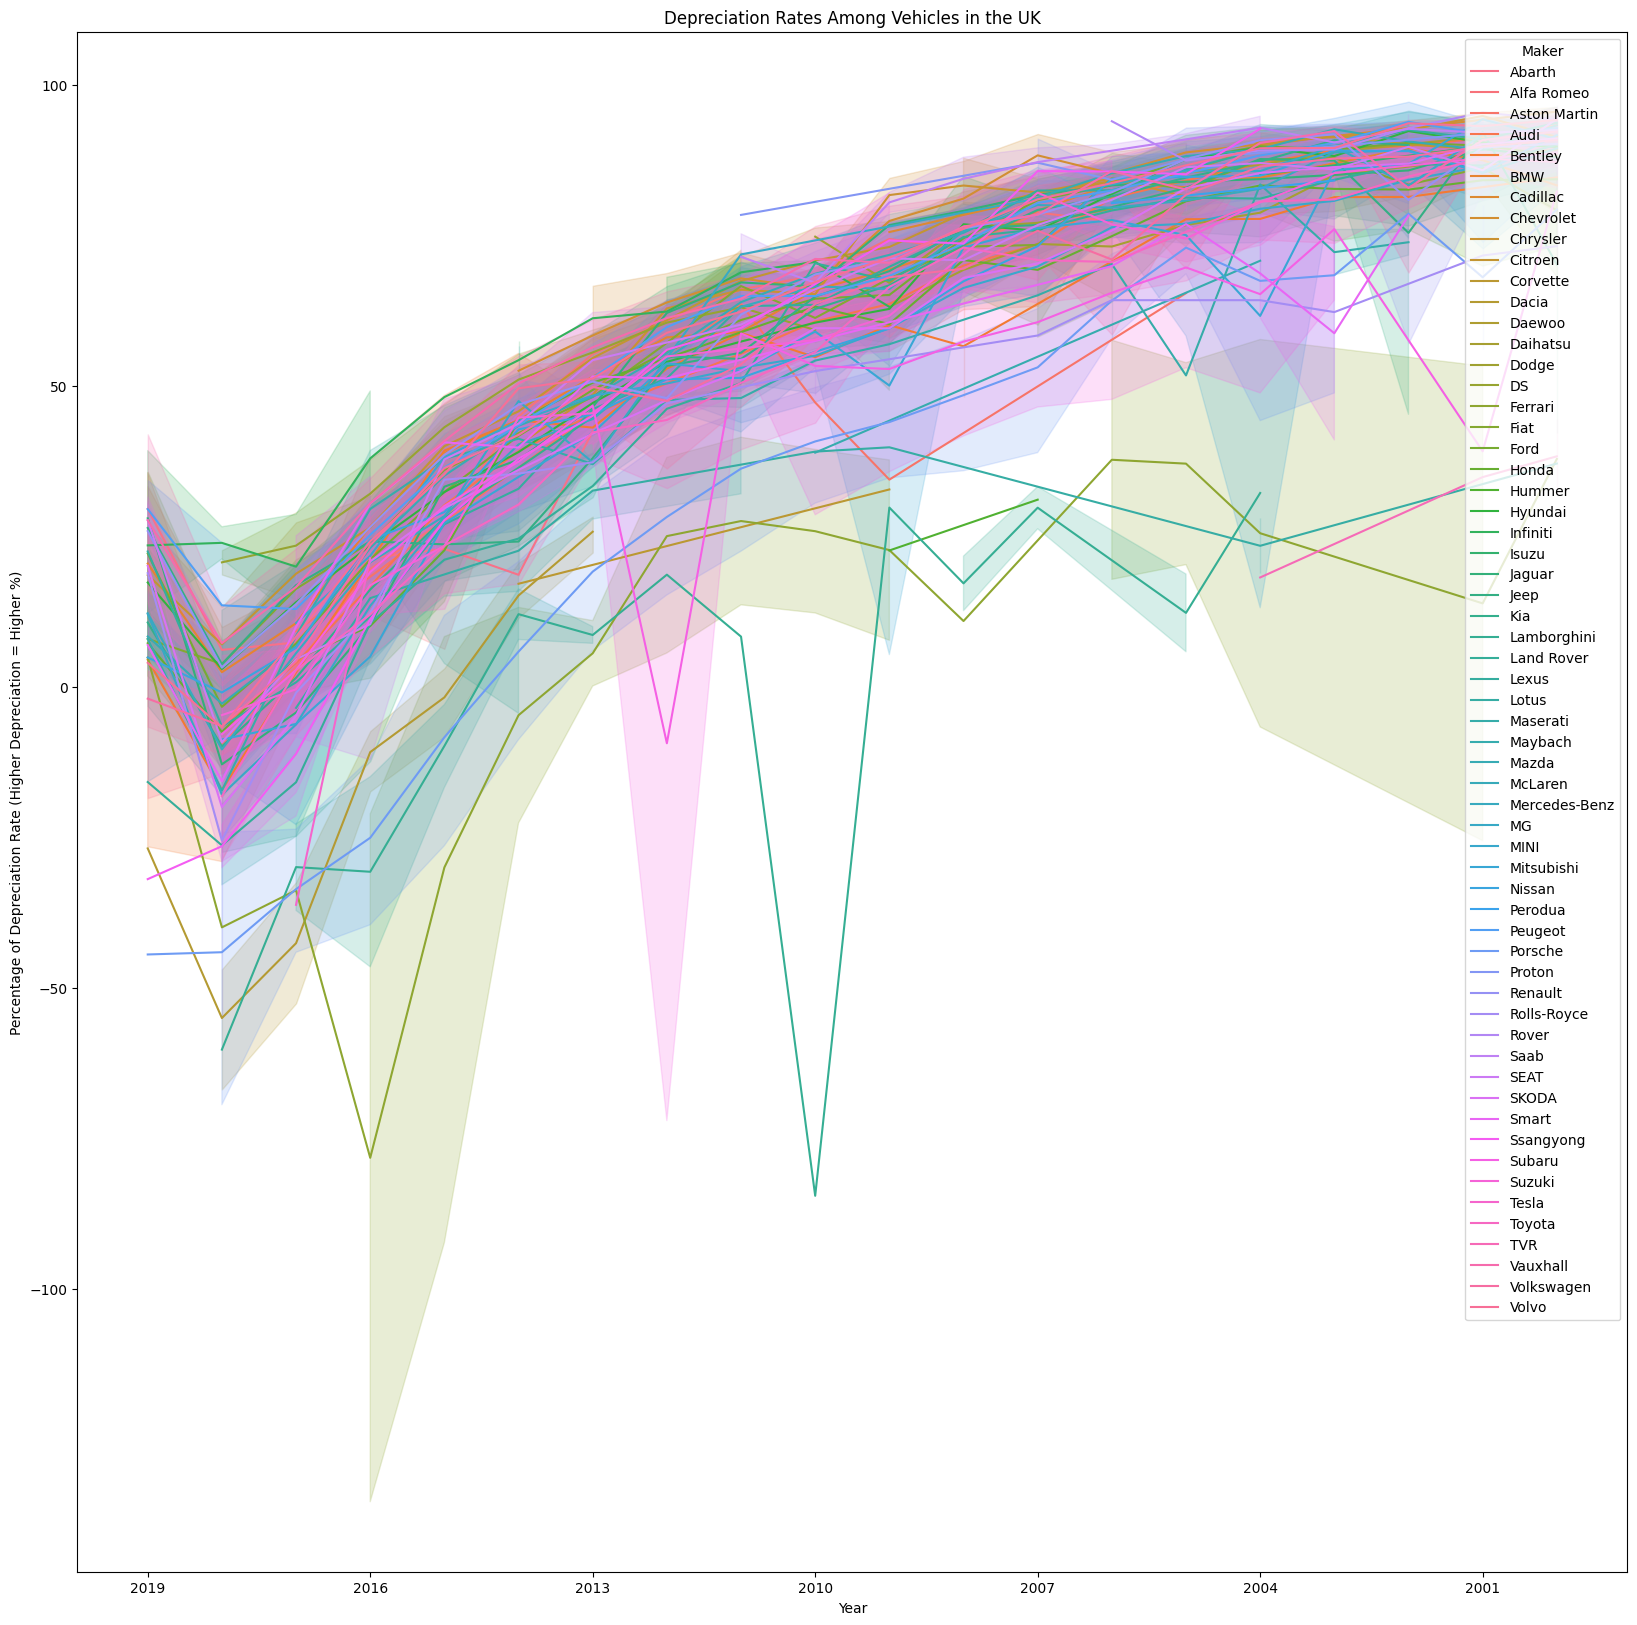

In [354]:
import matplotlib.ticker as ticker

# Plot using hue to represent different automakers
plt.figure(figsize=(20, 20))
sns.lineplot(
    data=price_depreciation,
    x='Year',
    y='Depreciation_Rate_Perc',
    hue='Maker'
)

# Fix for years showing as floating point numbers instead of integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Since we want to show the increase in depreciation as the vehicles get older, flip the x axis
plt.gca().invert_xaxis()

# Plot the data, setting legends and titles
plt.title('Depreciation Rates Among Vehicles in the UK')
plt.xlabel('Year')
plt.ylabel('Percentage of Depreciation Rate (Higher Depreciation = Higher %)')
plt.legend(title='Maker', loc='upper right')
plt.show()


**Statistical Observations**
We can see that from 2001 to around 2018, the valuation of cars have dipped below their original price with the lowest being around -75%

In [355]:
display(price_depreciation.describe())

,Year,Entry_price,Avg_Ad_Price,Depreciation_Rate,Depreciation_Rate_Perc
count,3520.00000,3520.000000,3520.000000,3520.000000,3520.000000
mean,2010.36392,26626.850284,15558.689054,0.519786,51.978573
std,5.36046,33471.228135,31559.651391,0.329894,32.989407
min,2000.00000,4830.000000,405.000000,-1.353218,-135.321804
25%,2006.00000,12320.000000,2952.741379,0.292633,29.263277
50%,2011.00000,17697.500000,7238.427432,0.581875,58.187538
75%,2015.00000,26203.000000,15203.649123,0.805041,80.504101
max,2019.00000,320120.000000,495000.000000,0.972800,97.280044


**Observations:**\
As the years go by, the value of the car no matter the company goes down according to the graph. After 2018 we see that the price of cars increase. There is an outlier in 2010 where there is a vehicle that depreciated down to around -75% but proceeds to jump back up to above 0% the next year.

**Hypothesis Testing:**\
Based on the data presented in the graph, my group suspects that the average depreciation rate of cars is below 50%.\
Null Hypothesis: The avearage depreciation rate >= 50%\
Alternative Hypothesis: The avearage depreciation rate < 50%\
Siginificance Level: 0.05

In [ ]:
sample_mean = price_depreciation['Depreciation_Rate_Perc'].mean()
population_mean = 50
#The standard deviation is from the table above under the Depreviation_Rate_Perc
population_std = price_depreciation['Depreciation_Rate_Perc'].std()
alpha = 0.05 #Significance level
n = len(price_depreciation['Depreciation_Rate_Perc'])

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value = stats.norm.cdf(z_score)
display(z_score)
display(p_value)
if p_value < alpha:
    display("Reject the null hypothesis: The average depreciation rate of cars is lower than 50%")
else:
    display("Fail to reject the null hypothesis: There isn't enough evidence to show that the average depreciation rate of cars is below 50%")

np.float64(3.558351091688836)

np.float64(0.9998134048677763)

"Fail to reject the null hypothesis: There isn't enough evidence to show that the average depreciation rate of cars is below 50%"

**Conclusion:**\
Based on the group's hypothesis testing, we failed to reject the null hypothesis because there isn't enough evidence to show that the average depreciation rate of cars is below 50%. The graph remains to mostly be a downward curve signaling that the price of cars depriciate over the years. Lastly, the Deprication_rate being around 32% ubducates that the depreciation varies widely across brands and models.

---

## Price vs Mileage by Gearbox Type

**Calculating Mileage vs. Price**\
To compare this, we create a table that compares mileage and price from the ads table as we are dealing with used cars. We observe the cost differences between the two types of gearboxes.

In [357]:
# Find vehicles that contain Automatic or Manual transmissions ONLY
ads_used = ads[(ads['Gearbox'].isin(['Automatic', 'Manual']))].copy()

# Ensure that the price data and mileage data is valid
ads_used['Price'] = pd.to_numeric(ads_used['Price'], errors='coerce')
ads_used['Runned_Miles'] = pd.to_numeric(ads_used['Runned_Miles'], errors='coerce')

# Drop any price or mileage that is 0 or NaN
ads_used = ads_used.dropna(subset=['Price', 'Runned_Miles'])

# We can afford to lost severe outliers, as it doesn't have a meaningful impact on the data
ads_used = ads_used[(ads_used['Runned_Miles'] < 250000) & (ads_used['Price'] < 250000)]


**Plot the data**\
Using a scatterplot, we not only see the sheer difference in the number of data points for each transmission, but how they relate to price vs mileage

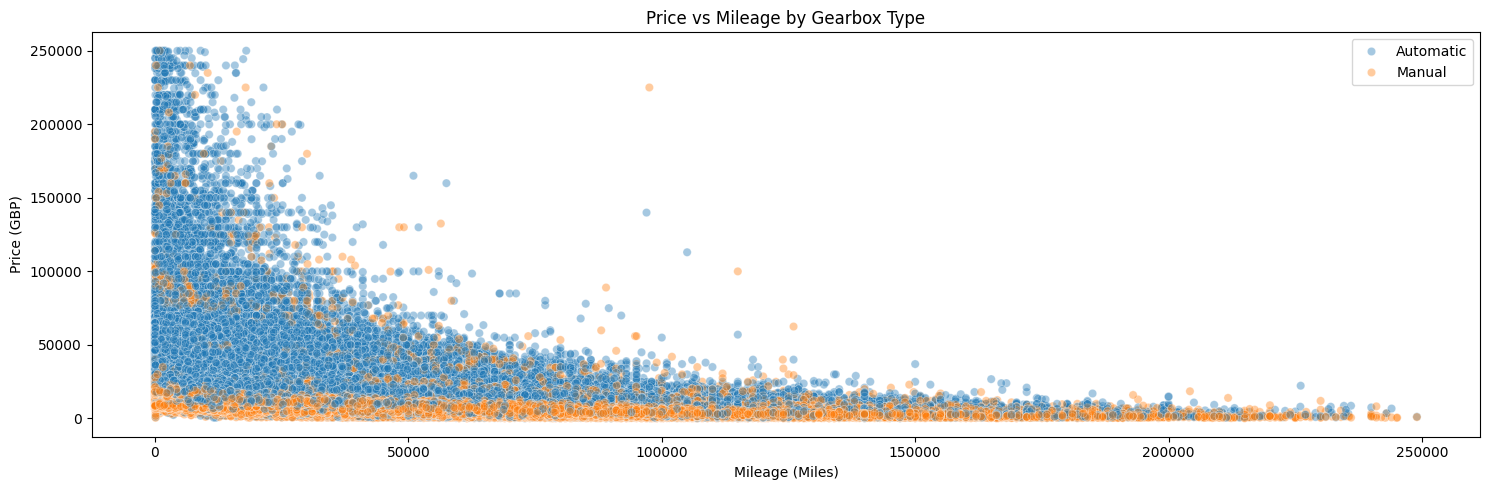

In [358]:
# Make the graph a moderate size
plt.figure(figsize=(15,5))

# Scatterplot for each gearbox type
sns.scatterplot(data=ads_used, x='Runned_Miles', y='Price', hue='Gearbox', alpha=0.4)

plt.title('Price vs Mileage by Gearbox Type')
plt.xlabel('Mileage (Miles)')
plt.ylabel('Price (GBP)')
plt.legend()
plt.tight_layout()
plt.show()

In [359]:
display(ads_used.describe())

,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num
count,262987.000000,262987.000000,262987.000000,262987.000000,262987.000000,257326.000000,259400.000000
mean,2018.128748,5.633685,2012.669923,48380.522140,14149.328153,4.908540,4.373797
std,0.745801,2.081316,4.462585,39496.440916,17776.796997,0.875413,1.007504
min,2012.000000,1.000000,1900.000000,0.000000,100.000000,1.000000,2.000000
25%,2018.000000,4.000000,2010.000000,14483.000000,4989.000000,5.000000,4.000000
50%,2018.000000,5.000000,2014.000000,39925.000000,9210.000000,5.000000,5.000000
75%,2018.000000,7.000000,2016.000000,75000.000000,16995.000000,5.000000,5.000000
max,2021.000000,33.000000,2019.000000,249000.000000,249995.000000,17.000000,7.000000


**Conclusion:**\
Based on the graph we see that the price of used automatic cars go down the more mileage the cars gain. The graph resembles a right skewed graph due to the cluster of points located at the right side of the graph. This means the graph is not normally distributed. We can also see that the manual car has remained mostly consistent in price no matter the mileage. In conclusion, used manual cars are more likely to be cheaper in price than used automatic cars no matter the mileage.

---

## Comparison of Top 15 Car Companies and Number of Ads for Different Body Types

**Observations**\
Using the data from the ads table, we will take the top 15 most popular companies in the UK between the years of 2001 and 2020 and their number of ads for Saloon, Coupe, and SUV body types.

In [360]:
# Filter out the Saloons, Coupes, and SUVs from the ads dataframe
type_comparison = ads[ads['Bodytype'].isin(['Saloon', 'Coupe', 'SUV'])].copy()

# Group by automaker and bodytpye, accumulating the number of ads per maker (put 0 if there are none)
type_comparison = type_comparison.groupby(['Maker', 'Bodytype']).size().reset_index(name='Ad_Count')

# Join automakers together where (rows = Company) & (columns = Bodytype)
type_comparison = type_comparison.pivot(index='Maker', columns='Bodytype', values='Ad_Count')

# Sort by total number of ads for these 3 types and find the top 15 makers
type_comparison['Total_Ads'] = type_comparison.sum(axis=1)
type_comparison = type_comparison.sort_values(by='Total_Ads', ascending=False).head(15)

# Remove the total column before plotting since it isnt neccessary
type_comparison = type_comparison.drop(columns='Total_Ads')

**Plotting the data**\
The data shown on the graph shows the top 15 automakers and the distribution of their body types.

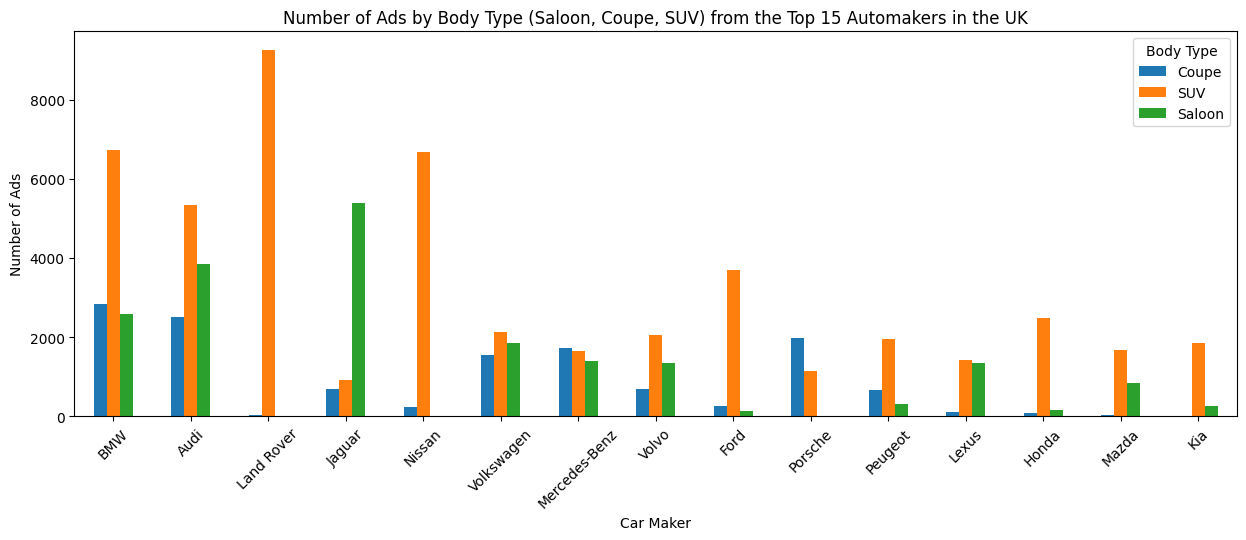

In [361]:
# Plot the data in a bar plot
type_comparison.plot(kind='bar', figsize=(15, 5))

# Graph header and titles
plt.title('Number of Ads by Body Type (Saloon, Coupe, SUV) from the Top 15 Automakers in the UK')
plt.xlabel('Car Maker')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.legend(title='Body Type')
plt.show()

In [362]:
display(type_comparison.describe())

Bodytype,Coupe,SUV,Saloon
count,14.000000,15.000000,14.000000
mean,959.571429,3270.133333,1394.571429
std,973.174402,2531.002621,1599.940177
min,26.000000,919.000000,4.000000
25%,144.000000,1663.500000,195.250000
50%,679.500000,2061.000000,1097.500000
75%,1688.000000,4525.000000,1742.000000
max,2840.000000,9261.000000,5390.000000


**Conclusion:**\
We can see from the bar graphs that car companies prefer to run SUV ads than other car types except for Jaguar because they value their Saloon car ads more. We can also see that Land Rover focuses more solely on their SUVs with over 8000 SUV ads only due to the lack of ads for their Saloon and Coupe cars which leads us to assume that Land Rover is an almost pure SUV car company. If we further look at the mean of the bar chart, we can observe that the mean of SUV is greater than Coupe and Saloon combined.

---